<a href="https://colab.research.google.com/github/DMNDKDasanayaka/Price-Prediction-Model/blob/main/newPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [ ]:
df = pd.read_csv("carrot_dataset.csv")
df.head()


,Date,Average_Carrot_Price,Fuel_Price,Average_Rainfall,Average_Temperature
0,2016.01.01,175.0,109,13.94325,21.275
1,2016.01.02,91.5,109,2.01325,20.875
2,2016.01.03,200.0,109,0.29300,21.900
3,2016.01.04,175.0,109,0.13325,22.150
4,2016.01.05,160.0,109,0.12350,22.375


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
df

,Average_Carrot_Price,Fuel_Price,Average_Rainfall,Average_Temperature
Date,,,,
2016-01-01,175.0,109,13.94325,21.275
2016-01-02,91.5,109,2.01325,20.875
2016-01-03,200.0,109,0.29300,21.900
2016-01-04,175.0,109,0.13325,22.150
2016-01-05,160.0,109,0.12350,22.375
...,...,...,...,...
2025-12-27,215.0,277,0.17500,19.225
2025-12-28,225.0,277,1.20000,19.900
2025-12-29,200.0,277,1.05000,20.500


In [ ]:
df.isnull().sum()


,0
Average_Carrot_Price,0
Fuel_Price,0
Average_Rainfall,0
Average_Temperature,0


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


Model 1 – Random Forest **Regressor**

In [ ]:
X = df.drop('Average_Carrot_Price', axis=1)
y = df['Average_Carrot_Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [ ]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)


RMSE: 216.0074314655827
MAE: 154.56409712722296
R²: -0.3199249604290155


Model 2 – LSTM (Main Time-Series Model)**bold text**

In [ ]:
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data)-time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps, 0])
    return np.array(X), np.array(y)

X_lstm, y_lstm = create_sequences(scaled_data)


In [ ]:
split = int(0.8 * len(X_lstm))
X_train, X_test = X_lstm[:split], X_lstm[split:]
y_train, y_test = y_lstm[:split], y_lstm[split:]


In [ ]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1
)


Epoch 1/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0388 - val_loss: 0.1566
Epoch 2/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0360 - val_loss: 0.1552
Epoch 3/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0362 - val_loss: 0.1592
Epoch 4/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0354 - val_loss: 0.1617
Epoch 5/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0379 - val_loss: 0.1553
Epoch 6/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0372 - val_loss: 0.1634
Epoch 7/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0353 - val_loss: 0.1651
Epoch 8/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0355 - val_loss: 0.1623
Epoch 9/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0332 - val_loss: 0.1655
Epoch 10/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0316 - val_loss: 0.1652
Epoch 11/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0358 - val_loss: 0.1729
Epoch 12/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/st

In [16]:
y_pred_lstm = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
mae = mean_absolute_error(y_test, y_pred_lstm)
r2 = r2_score(y_test, y_pred_lstm)

print("LSTM RMSE:", rmse)
print("LSTM MAE:", mae)
print("LSTM R²:", r2)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
LSTM RMSE: 1.194996309852114
LSTM MAE: 0.6838184647816202
LSTM R²: 0.3634556994939906


In [17]:
last_sequence = X_lstm[-1].reshape(1, X_lstm.shape[1], X_lstm.shape[2])
future_price = model.predict(last_sequence)

print("Predicted Next Period Price:", future_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Next Period Price: [[0.148108]]


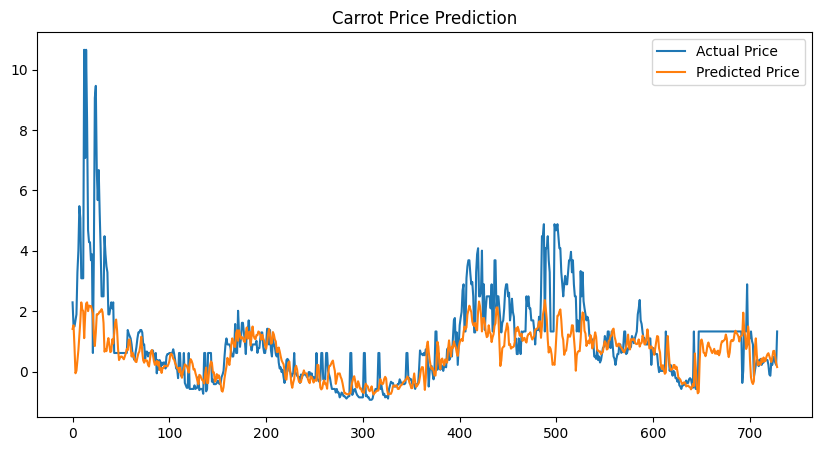

In [18]:
plt.figure(figsize=(10,5))
plt.plot(y_test, label="Actual Price")
plt.plot(y_pred_lstm, label="Predicted Price")
plt.legend()
plt.title("Carrot Price Prediction")
plt.show()


In [24]:
future_data = pd.DataFrame({
    'Average_Temperature': [19.5],
    'Average_Rainfall': [40],
    'Fuel_Price': [340]
})


In [25]:
future_scaled = scaler.transform(future_data)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Average_Carrot_Price


In [23]:
future_price = rf.predict(future_scaled)
print("Predicted Future Carrot Price:", future_price[0])


NameError: name 'future_scaled' is not defined